In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [34]:
df = pd.read_csv('Dengue Dataset 2022.csv')
df

,date,Infected,Death
0,01/01/2022,4,0
1,11/01/2022,3,0
2,21/01/2022,0,0
3,31/01/2022,1,0
4,10/02/2022,0,0
5,20/02/2022,0,0
6,02/03/2022,1,0
7,12/03/2022,0,0
8,22/03/2022,0,0
9,01/04/2022,0,0


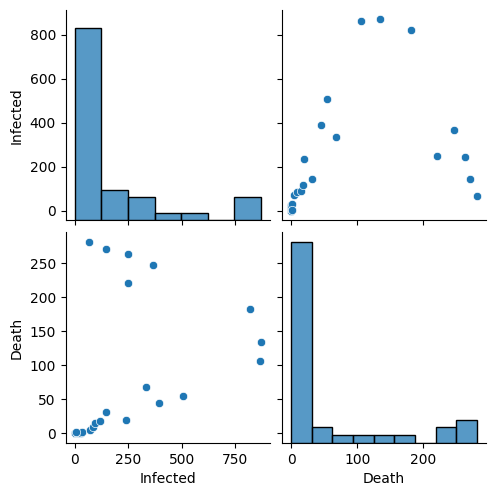

In [36]:
sns.pairplot(df)

In [37]:
df.describe().round(2)

,Infected,Death
count,37.00,37.00
mean,154.62,53.30
std,247.61,91.27
min,0.00,0.00
25%,1.00,0.00
50%,27.00,1.00
75%,237.00,55.00
max,869.00,281.00


In [24]:
dengue_data = df['Infected'].values

In [25]:
dengue_incidence = ctrl.Antecedent(np.arange(0, max(dengue_data) + 1, 1), 'Infected')

In [26]:
time = ctrl.Consequent(np.arange(0, 31, 1), 'date')

In [27]:
dengue_incidence['low'] = fuzz.trimf(dengue_incidence.universe, [0, 0, max(dengue_data) / 3])
dengue_incidence['medium'] = fuzz.trimf(dengue_incidence.universe, [0, max(dengue_data) / 3, 2 * max(dengue_data) / 3])
dengue_incidence['high'] = fuzz.trimf(dengue_incidence.universe, [max(dengue_data) / 3, 2 * max(dengue_data) / 3, max(dengue_data)])

time['short'] = fuzz.trimf(time.universe, [0, 0, 15])
time['medium'] = fuzz.trimf(time.universe, [5, 15, 25])
time['long'] = fuzz.trimf(time.universe, [15, 30, 30])

In [28]:
# Define fuzzy rules
rule1 = ctrl.Rule(dengue_incidence['low'], time['long'])
rule2 = ctrl.Rule(dengue_incidence['medium'], time['medium'])
rule3 = ctrl.Rule(dengue_incidence['high'], time['short'])

In [29]:
# Create a control system and simulate it with Dengue Incidence data
system = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(system)

In [30]:
predicted_time = []

for value in dengue_data:
    sim.input['Infected'] = value
    
    # Attempt to compute the output while handling exceptions
    try:
        sim.compute()
        predicted_time.append(sim.output['date'])
    except Exception as e:
        # Handle the case where no rule is fired and set a default value
        predicted_time.append(0)  # Set a default value (0 in this case)

# Convert the predicted time to an integer
predicted_time = np.round(predicted_time).astype(int)

In [32]:
# Convert the predicted time to an integer
predicted_time = np.round(predicted_time).astype(int)

In [47]:
# Example: Print the first 10 predictions
print("Predicted Time for the first 10 Dengue Incidence values:")
print(predicted_time[:37])

Predicted Time for the first 10 Dengue Incidence values:
[25 25 25 25 25 25 25 25 25 25 25 25 25 25 24 24 24 23 23 25 21 21 20 20
 16 19 13  9 14  7  0  7 16 13 16 19 21]
